# Explore Boosting Algorithm with diabetes dataset

In [1]:
# Instalación de dependencias

!pip install xgboost==2.1.0
!pip install scikit-learn==1.5.2

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Nota: El set de datos que ocupara es para identificar si ciertas personas son diabéticas o no lo son, 
# por lo tanto, estamos hablando de un problema de clasificiación

# Paso 1. Lectura de set de datos

import pandas as pd

all_data = pd.read_csv("../data/diabetes.csv")
all_data.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
all_data = all_data.drop_duplicates().reset_index(drop=True) # En esta línea se eliminan los duplicados 
all_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# No normalization of variables is needed for training this model

# Feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = all_data.drop("Outcome", axis = 1)
y = all_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0          2.0     84.0            0.0      0.0   0.0   
1          9.0    112.0           82.0      0.0  28.2   
2          1.0    139.0           46.0     83.0  28.7   
3          0.0    161.0           50.0      0.0  21.9   
4          6.0    134.0           80.0    370.0  46.2   

   DiabetesPedigreeFunction   Age  
0                     0.304  21.0  
1                     1.282  50.0  
2                     0.654  22.0  
3                     0.254  65.0  
4                     0.238  46.0

In [5]:
X_test_sel.head()

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0          6.0     98.0           58.0    190.0  34.0   
1          2.0    112.0           75.0      0.0  35.7   
2          2.0    108.0           64.0      0.0  30.8   
3          8.0    107.0           80.0      0.0  24.6   
4          7.0    136.0           90.0      0.0  29.9   

   DiabetesPedigreeFunction   Age  
0                     0.430  43.0  
1                     0.148  21.0  
2                     0.158  21.0  
3                     0.856  34.0  
4                     0.210  50.0

In [6]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/diabetes_train.csv", index = False)
X_test_sel.to_csv("../data/processed/diabetes_test.csv", index = False)

In [7]:
diabetes_train_data = pd.read_csv("../data/processed/diabetes_train.csv")
diabetes_test_data = pd.read_csv("../data/processed/diabetes_test.csv")

diabetes_train_data.head()

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0          2.0     84.0            0.0      0.0   0.0   
1          9.0    112.0           82.0      0.0  28.2   
2          1.0    139.0           46.0     83.0  28.7   
3          0.0    161.0           50.0      0.0  21.9   
4          6.0    134.0           80.0    370.0  46.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.304  21.0        0  
1                     1.282  50.0        1  
2                     0.654  22.0        0  
3                     0.254  65.0        0  
4                     0.238  46.0        1

In [8]:
# Paso 2. Entrenamiento del modelo para clasificación
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [9]:
# Predicción del modelo
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [10]:
from sklearn.metrics import accuracy_score

# Para saber si el modelo esta acertando o no, se utiliza la métrica de precisión 
accuracy_score(y_test, y_pred)

0.7077922077922078

## RandomizedSearchCV

In [11]:
# Con el fin de mejorar el modelo se usa la hiperparámetrización
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


#Espacio de búsqueda de cada hiper parámetro para XGBOOST

xg_rsv = {"n_estimators": np.arange(50,600, 50),
          "max_depth": [None, 3, 5, 10,15,20,30],
          "min_samples_split": np.arange(2,20, 2),
          "min_samples_leaf": np.arange(2, 20, 2),
          "max_features": [1,2,3,4,"sqrt","auto"],
          "learning_rate": [0.01, 0.1, 0.2,0.5,1],
          "gamma": [0, 0.1, 0.4],
          "alpha": [0, 0.1, 1]}

# Búsqueda por validación cruzada para XGBRegressor
xg_model = RandomizedSearchCV(XGBClassifier(),
                              param_distributions=xg_rsv,
                              scoring    = 'neg_root_mean_squared_error',
                              n_iter=5,
                              cv=5,
                              n_jobs = -1,
                              verbose=True,
                              random_state=42)

xg_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:38:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:38:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:38:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:38:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warni

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'gamma': [0, 0.1, 0.4],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.5,
                                                          1],
                                        'max_depth': [None, 3, 5, 10, 15, 20,
                                                      30],
                                        'max_features': [1, 2, 3, 4, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=True)

In [12]:
## Mejores parámetros
xg_model.best_params_

{'n_estimators': np.int64(100),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(6),
 'max_features': 4,
 'max_depth': 30,
 'learning_rate': 0.2,
 'gamma': 0,
 'alpha': 0.1}

In [13]:
xgb_ideal_model = XGBClassifier(**xg_model.best_params_)
xgb_ideal_model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:39:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_features=4,
              max_leaves=None, min_child_weight=None,
              min_samples_leaf=np.int64(6), min_samples_split=np.int64(8),
              missing=nan, monotone_constraints=None, multi_strategy=None, ...)

In [14]:
y_pred_rs = xgb_ideal_model.predict(X_test)
y_pred_rs

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_rs)}")
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred_rs))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_rs)}")

Error cuadrático medio: 0.2662337662337662
Raíz del Error cuadrático medio: 0.515978455203089
Coeficiente de determinación: -0.15959595959595996


In [18]:
# De nuevo se obtiene la métrica de precisión, con el fin de determinar si optimizo la precisión de la predicción.
# En este caso se observa que sí hubo una mejora
accuracy_score(y_test, y_pred_rs)

0.7337662337662337

## GridSearchCV

In [19]:
# Importar libreria
from sklearn.model_selection import GridSearchCV

#Espacio de búsqueda de cada hiper parámetro para XGBOOST

xg_grid = {"n_estimators": [100,200,300,400],
          "max_depth": [1,2],
          "min_samples_split": [16,18,20],
          "min_samples_leaf": [14,16,18],
          "max_features": [3,4,"sqrt","auto"],
          "learning_rate": [0.5, 1],
          "gamma": [0, 0.1],
          "alpha": [0,0.1]}

# Búsqueda por validación cruzada para XGBRegressor
xg_model_grid = GridSearchCV(XGBClassifier(),
                              param_grid=xg_grid,
                              scoring    = 'neg_root_mean_squared_error',
                              cv=5,
                              n_jobs = -1,
                              verbose=True)

xg_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warni

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warni

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 0.1], 'gamma': [0, 0.1],
                         'learning_rate': [0.5, 1], 'max_depth': [1, 2],
                         'max_features': [3, 4, 'sqrt', 'auto'],
                         'min_samples_leaf': [14, 16, 18],
                         'min_samples_split': [16, 18, 20],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [20]:
xg_model_grid.best_params_

{'alpha': 0,
 'gamma': 0,
 'learning_rate': 0.5,
 'max_depth': 1,
 'max_features': 3,
 'min_samples_leaf': 14,
 'min_samples_split': 16,
 'n_estimators': 400}

In [21]:
xgb_ideal_model_g = XGBClassifier(**xg_model_grid.best_params_)
xgb_ideal_model_g.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_features=3, max_leaves=None,
              min_child_weight=None, min_samples_leaf=14, min_samples_split=16,
              missing=nan, monotone_constraints=None, multi_strategy=None, ...)

In [22]:
y_pred_gd = xgb_ideal_model_g.predict(X_test)
y_pred_gd

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [23]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_gd)}")
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred_gd))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_gd)}")

Error cuadrático medio: 0.2857142857142857
Raíz del Error cuadrático medio: 0.5345224838248488
Coeficiente de determinación: -0.2444444444444449


In [24]:
y_pred_train = xgb_ideal_model_g.predict(X_train)

In [ ]:
# De nuevo se obtiene la métrica de precisión, con el fin de determinar si optimizo la precisión de la predicción.
# En este caso se observa que sí hubo una mejora, pero es menor que RandomizedSearch:
accuracy_score(y_test, y_pred_gd)

0.7142857142857143

In [25]:
print(f"Error cuadrático medio: {mean_squared_error(y_train, y_pred_train)}")
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Coeficiente de determinación: {r2_score(y_train, y_pred_train)}")

Error cuadrático medio: 0.11074918566775244
Raíz del Error cuadrático medio: 0.3327900023554681
Coeficiente de determinación: 0.5111751138585462


In [26]:
xgb_ideal_model_g.feature_importances_

array([0.05028493, 0.27447042, 0.06731374, 0.03670467, 0.05464803,
       0.17902306, 0.05352902, 0.28402615], dtype=float32)

In [28]:
# Caracteristicas más importantes

df = (pd.DataFrame({"Caracteristicas": X_train.columns,
                        "valores": xgb_ideal_model_g.feature_importances_})
          .sort_values("valores", ascending=False))

In [29]:
df

Caracteristicas   valores
7                       Age  0.284026
1                   Glucose  0.274470
5                       BMI  0.179023
2             BloodPressure  0.067314
4                   Insulin  0.054648
6  DiabetesPedigreeFunction  0.053529
0               Pregnancies  0.050285
3             SkinThickness  0.036705

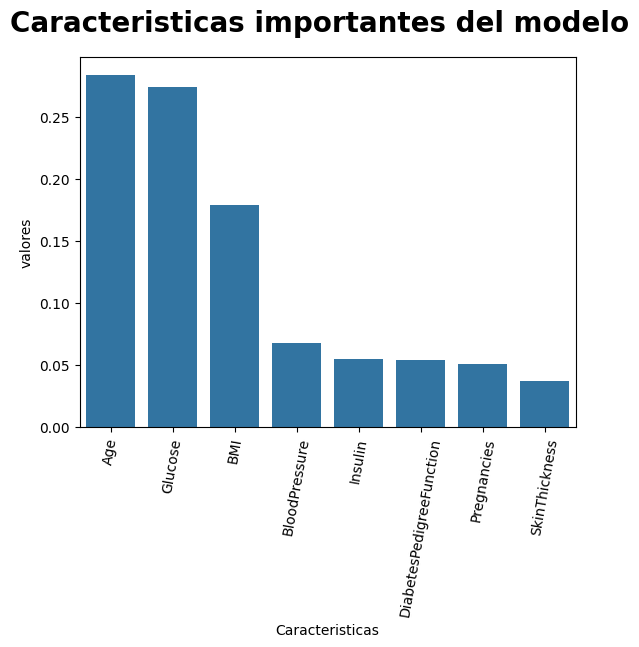

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Caracteristicas',y = 'valores',data = df, legend=False)
plt.suptitle('Caracteristicas importantes del modelo' , fontweight = 'black', fontsize=20)
plt.xticks(rotation=80);

#### Interpretación:
De acuerdo al gráfico anterior, es posible determinar las variables que suelen ser más relevantes, 
en este caso la edad, el nivel de glucosa y el BMI son los valores más importantes.

In [31]:
# Imoportar librería para análisis
%pip install shap
import shap

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 17.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 10.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


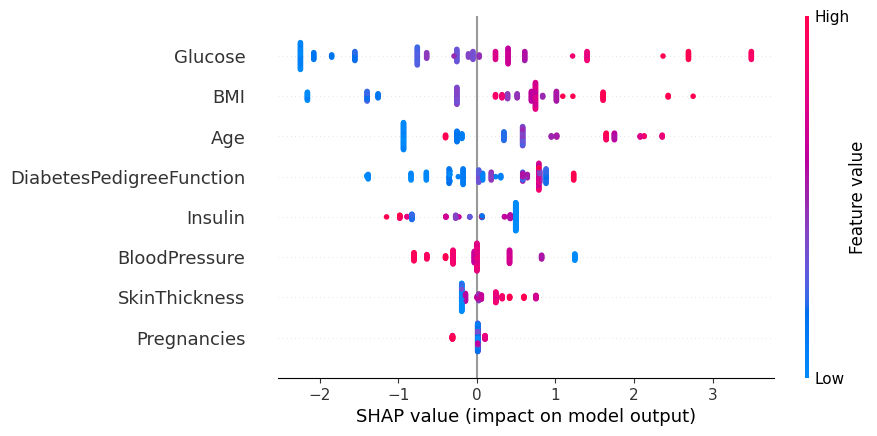

In [32]:
# Xgboost
explainer_xg = shap.TreeExplainer(xgb_ideal_model_g, X_train, feature_names=X_train.columns)
shap_values_xg = explainer_xg(X_test)
shap.plots.beeswarm(shap_values_xg)

#### Interpretación:
Con el gráfico anterior, es más sencillo identificar que impacto tienen las variables en el resultado del modelo. 
Podemos ver en rojo, que la Glucosa, el BMI y la Edad tienen a tener un impacto más importante, lo que se puede corroborar
con la gráfica anterior a esta.


In [33]:
X_train.shape

(614, 8)